In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from textblob import TextBlob
%matplotlib inline

In [2]:
data = pd.read_csv('data/bitcointweets.csv', header=None)

In [3]:
data.shape

(50859, 8)

In [4]:
data.head(100)

,0,1,2,3,4,5,6,7
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
...,...,...,...,...,...,...,...,...
95,Fri Mar 23 00:41:37 +0000 2018,Bitcoin heading back down. \u2026 $BTCUSD htt...,TV_TradingIdeas,13877,0,[],"<a href=""https://www.tradingview.com"" rel=""nof...",['negative']
96,Fri Mar 23 00:41:39 +0000 2018,RT @RichardHeartWin: The #Bitcoin 50/200 daily...,FollowJRB,414,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/iphone"" r...",['negative']
97,Fri Mar 23 00:41:39 +0000 2018,Facebook's data privacy fallout could give a b...,MeetInnovation,11133,0,[],"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",['neutral']
98,Fri Mar 23 00:41:40 +0000 2018,RT @BeerMoneyFunds: Bank of Japan: No Big Prob...,Criptovaleur,1124,0,[],"<a href=""https://plus.google.com/1021286754998...",['positive']


In [5]:
df = data[[1,7]]
df.columns = ['tweet','label']
df.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']


In [6]:
df.tail()

,tweet,label
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive']
50855,RT @bethereumteam: After a successful launch o...,['positive']
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral']
50857,I added a video to a @YouTube playlist https:/...,['positive']
50858,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...,['positive']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50859 non-null  object
 1   label   50859 non-null  object
dtypes: object(2)
memory usage: 794.8+ KB


C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

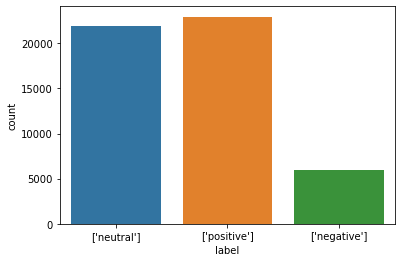

In [8]:
sns.countplot(df['label'])

In [9]:
# text length
df['text_length'] = df['tweet'].apply(len)
df[['label','text_length','tweet']].head()

<ipython-input-9-847440051ff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['tweet'].apply(len)


,label,text_length,tweet
0,['neutral'],140,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h..."
1,['neutral'],137,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...
2,['positive'],140,RT @tippereconomy: Another use case for #block...
3,['positive'],34,free coins https://t.co/DiuoePJdap
4,['positive'],146,RT @payvxofficial: WE are happy to announce th...


In [10]:
df['text_length'].describe()

count    50859.000000
mean       127.650072
std         23.595770
min          7.000000
25%        126.000000
50%        140.000000
75%        140.000000
max        166.000000
Name: text_length, dtype: float64

<AxesSubplot:>

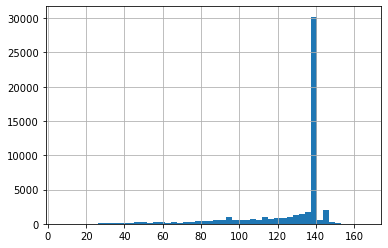

In [11]:
df['text_length'].hist(bins=50)

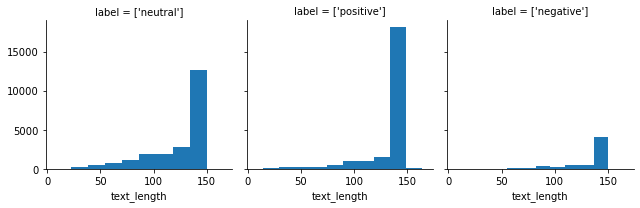

In [12]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

In [13]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

Remove punctuations

In [14]:
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    s = re.sub("#bitcoin", 'bitcoin', s) # removes the '#' from bitcoin
    s = re.sub("#Bitcoin", 'Bitcoin', s) # removes the '#' from Bitcoin
    s = re.sub('#[A-Za-z0-9]+', '', s) # removes any string with a '#'
    s = re.sub('\\n', '', s) # removes the '\n' string
    s = re.sub('https:\/\/\S+', '', s) # removes any hyperlinks
    return s
df['clean_tweet'] = df['tweet'].apply(clean_text) 

<ipython-input-14-755ee549e7d2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['tweet'].apply(clean_text)


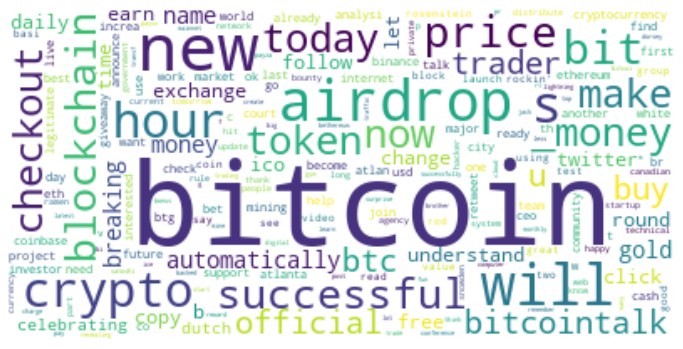

In [15]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['clean_tweet'].to_string().lower() 

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [16]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_punct(x))
df.head(10)

<ipython-input-17-049acbf3ba02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_punct(x))


,tweet,label,text_length,clean_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...
5,Copy successful traders automatically with Bit...,['positive'],138,Copy successful traders automatically with Bit...
6,RT @bethereumteam: We're revealing our surpris...,['positive'],140,Were revealing our surprise tomorrow Are you...
7,One click to start mining cryptocurrencies tog...,['neutral'],126,One click to start mining cryptocurrencies tog...
8,"first speaker @digitsu\n\n""how we can get bitc...",['positive'],139,first speaker how we can get bitcoin to be the...
9,@p0nd3ea Bitcoin wasn't built to live on excha...,['positive'],51,Bitcoin wasnt built to live on exchanges


Tokenization

In [18]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['clean_tweet'].apply(lambda x: tokenization(x.lower()))
df.head()

<ipython-input-18-8ab7e56acb92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_tokenized'] = df['clean_tweet'].apply(lambda x: tokenization(x.lower()))


,tweet,label,text_length,clean_tweet,Tweet_tokenized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin..."
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ..."


Remove Stopwords

In [19]:
#stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

<ipython-input-19-c7250f6b2328>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))


,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now..."
5,Copy successful traders automatically with Bit...,['positive'],138,Copy successful traders automatically with Bit...,"[copy, successful, traders, automatically, wit...","[copy, successful, traders, automatically, bit..."
6,RT @bethereumteam: We're revealing our surpris...,['positive'],140,Were revealing our surprise tomorrow Are you...,"[, were, revealing, our, surprise, tomorrow, a...","[, revealing, surprise, tomorrow, ready, celeb..."
7,One click to start mining cryptocurrencies tog...,['neutral'],126,One click to start mining cryptocurrencies tog...,"[one, click, to, start, mining, cryptocurrenci...","[one, click, start, mining, cryptocurrencies, ..."
8,"first speaker @digitsu\n\n""how we can get bitc...",['positive'],139,first speaker how we can get bitcoin to be the...,"[first, speaker, how, we, can, get, bitcoin, t...","[first, speaker, bitcoin, greatest, cash, worl..."
9,@p0nd3ea Bitcoin wasn't built to live on excha...,['positive'],51,Bitcoin wasnt built to live on exchanges,"[, bitcoin, wasnt, built, to, live, on, exchan...","[, bitcoin, wasnt, built, live, exchanges]"


Stemming and Lammitization

In [21]:
import nltk
from nltk import *

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ..."


Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word.

In [22]:
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now..."


In [23]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text

Vectorisation

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

50859 tweets has 47125 words


In [25]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaaamhim,aabaafaabdcafacabacb,aabhishekbankar,aadbeaeccabfadcdbaec,aadhaar,aadi,aadikum,aadrak,aamirzaki,...,ℹ,ツ,ビットコイン,ㆍ,ㆍacat,区块链,時分現在,時現在,比特币,転載元
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now..."


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet             50859 non-null  object 
 1   label             50859 non-null  object 
 2   text_length       50859 non-null  int64  
 3   clean_tweet       50859 non-null  object 
 4   Tweet_tokenized   50859 non-null  object 
 5   Tweet_nonstop     50859 non-null  object 
 6   Tweet_stemmed     50859 non-null  object 
 7   Tweet_lemmatized  50859 non-null  object 
 8   subjectivity      50859 non-null  float64
 9   polarity          50859 non-null  float64
 10  sentiment         50859 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [27]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['clean_tweet'].to_string().lower()  

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

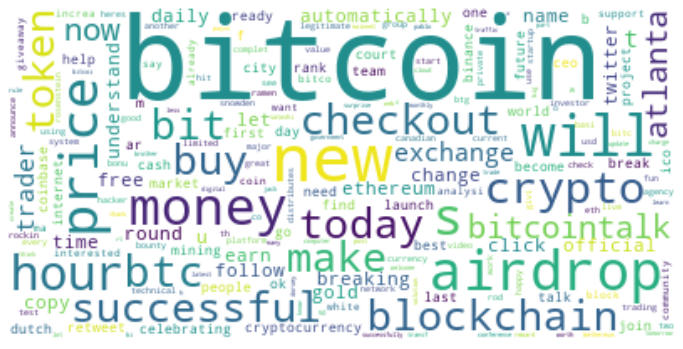

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review2.png")

In [29]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['Tweet_lemmatized'].to_string().lower() 

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

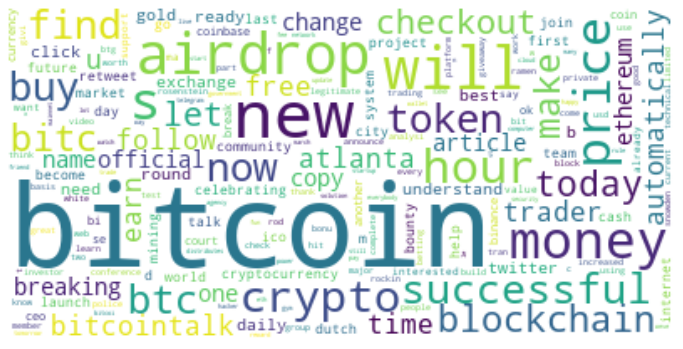

In [30]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review3.png")

In [31]:
import pycaret
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.2.0


In [32]:
rawdata = pd.read_csv('data/bitcointweets.csv', header=None)
print(rawdata.shape)

(50859, 8)


In [33]:
df2 = rawdata[[1,7]]
df2.columns = ['tweet','label']
df2.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']


In [34]:
from pycaret.nlp import *

In [40]:
import os
os.environ["PYTHONHTTPSVERIFY"] = "0"

In [41]:
#convert 'tweet' column of dataset into list format
text_list = list(df2['tweet'])
type(text_list)
exp_nlp101_list = setup(data = text_list, session_id = 123)

INFO:logs:PyCaret NLP Module
INFO:logs:version 2.2.3
INFO:logs:Initializing setup()
INFO:logs:USI: b6f5
INFO:logs:setup(data=50859, target=None, custom_stopwords=None, html=True, session_id=123, log_experiment=False,
                    experiment_name=None, log_plots=False, log_data=False, verbose=True)
INFO:logs:Checking environment
INFO:logs:python_version: 3.8.8
INFO:logs:python_build: ('default', 'Apr 13 2021 15:08:03')
INFO:logs:machine: AMD64
INFO:logs:platform: Windows-10-10.0.19041-SP0
INFO:logs:Memory: svmem(total=16750477312, available=2587226112, percent=84.6, used=14163251200, free=2587226112)
INFO:logs:Physical Core: 4
INFO:logs:Logical Core: 8
INFO:logs:Checking libraries
INFO:logs:pd==1.2.4
INFO:logs:numpy==1.20.1
INFO:logs:gensim==3.8.3
INFO:logs:spacy==3.0.6
INFO:logs:nltk==3.6.1
INFO:logs:textblob==0.15.3
INFO:logs:pyLDAvis==3.3.1
INFO:logs:wordcloud==1.8.1
INFO:logs:mlflow==1.7.0
INFO:logs:Checking Exceptions
ERROR:root:Internal Python error in the inspect module.
B

Traceback (most recent call last):
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\pycaret\nlp.py", line 313, in setup
    sp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\spacy\__init__.py", line 50, in load
    return util.load_model(
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\spacy\util.py", line 331, in load_model
    raise IOError(Errors.E050.format(name=name))
OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-7e8722947839>", line 4, in <module>
    exp_nlp101_list = setup(data = text_list, session_id = 123)
  File "C:\U

TypeError: object of type 'NoneType' has no len()

In [ ]:
exp_nlp101 = setup(data = df2, target = 'tweet', session_id = 123)

In [38]:
from pycaret.datasets import get_data
kiva = get_data('kiva')
from pycaret.nlp import *


,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [39]:
exp_name = setup(data = kiva, target = 'en')

INFO:logs:PyCaret NLP Module
INFO:logs:version 2.2.3
INFO:logs:Initializing setup()
INFO:logs:USI: b14a
INFO:logs:setup(data=(6818, 7), target=en, custom_stopwords=None, html=True, session_id=None, log_experiment=False,
                    experiment_name=None, log_plots=False, log_data=False, verbose=True)
INFO:logs:Checking environment
INFO:logs:python_version: 3.8.8
INFO:logs:python_build: ('default', 'Apr 13 2021 15:08:03')
INFO:logs:machine: AMD64
INFO:logs:platform: Windows-10-10.0.19041-SP0
INFO:logs:Memory: svmem(total=16750477312, available=2971648000, percent=82.3, used=13778829312, free=2971648000)
INFO:logs:Physical Core: 4
INFO:logs:Logical Core: 8
INFO:logs:Checking libraries
INFO:logs:pd==1.2.4
INFO:logs:numpy==1.20.1
INFO:logs:gensim==3.8.3
INFO:logs:spacy==3.0.6
INFO:logs:nltk==3.6.1
INFO:logs:textblob==0.15.3
INFO:logs:pyLDAvis==3.3.1
INFO:logs:wordcloud==1.8.1
INFO:logs:mlflow==1.7.0
INFO:logs:Checking Exceptions
ERROR:root:Internal Python error in the inspect module

Traceback (most recent call last):
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\pycaret\nlp.py", line 313, in setup
    sp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\spacy\__init__.py", line 50, in load
    return util.load_model(
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\spacy\util.py", line 331, in load_model
    raise IOError(Errors.E050.format(name=name))
OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\IlksenEceAy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-24aa0b10f5f1>", line 1, in <module>
    exp_name = setup(data = kiva, target = 'en')
  File "C:\Users\IlksenEceA

TypeError: object of type 'NoneType' has no len()

Derive label using sentiment analysis 

In [42]:
from textblob import TextBlob

In [43]:
# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [44]:
# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['polarity'] = df['clean_tweet'].apply(getPolarity)

In [45]:
df.head(5)

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,subjectivity,polarity
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,...",0.5,0.000000
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]",0.0,0.000000
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang...",0.5,0.136364
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]",0.8,0.400000
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now...",1.0,0.800000


In [46]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [47]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,subjectivity,polarity,sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,...",0.5,0.000000,neutral
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]",0.0,0.000000,neutral
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang...",0.5,0.136364,positive
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]",0.8,0.400000,positive
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now...",1.0,0.800000,positive


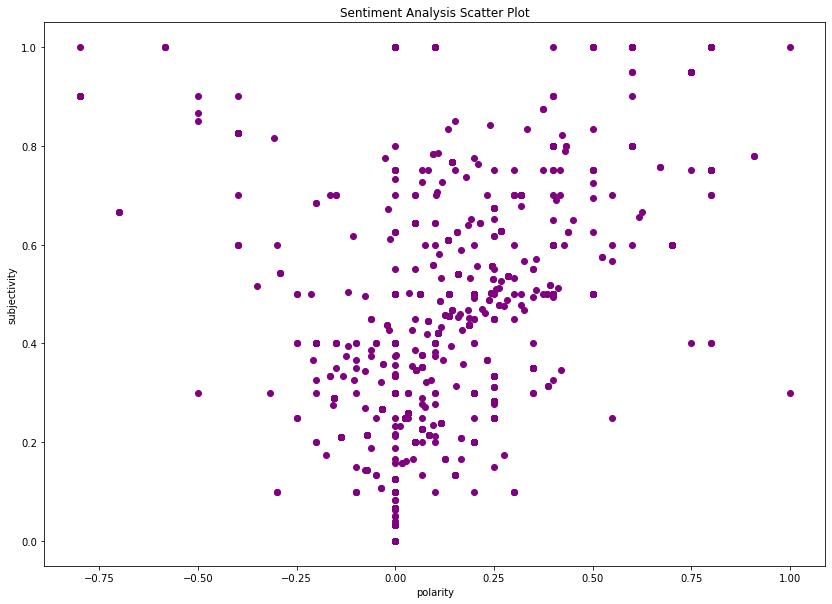

In [48]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

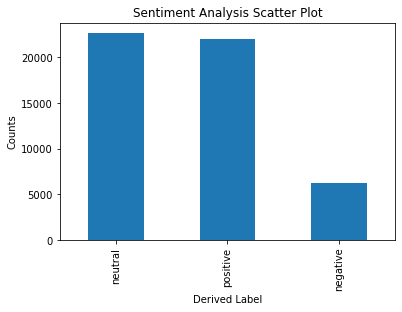

In [51]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Derived Label")
plt.ylabel("Counts")
plt.show()

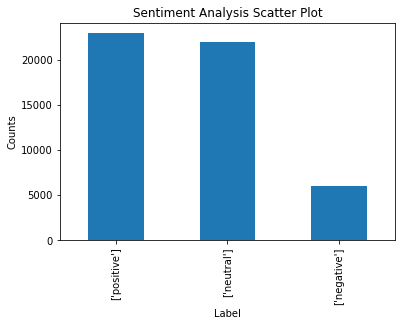

In [52]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['label'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()